In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

In [2]:
df = pd.read_csv('1632300362534233.csv')
df = df.dropna()

In [3]:
le = LabelEncoder()
le.fit(df['Parking'])
df['Parking'] = le.transform(df['Parking'])

In [4]:
le.fit(df['Warehouse'])
df['Warehouse'] = le.transform(df['Warehouse'])

In [5]:
le.fit(df['Address'])
df['Address'] = le.transform(df['Address'])

In [6]:
le.fit(df['Elevator'])
df['Elevator'] = le.transform(df['Elevator'])

In [ ]:
# converting area values from str to numeric
df["Area"] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')
mylist = []
for i in df['Area']:
    if i > 1000 :
        print(i)
        mylist.append(i)

bad_rows = []
for index,row in df.iterrows():
    if row['Area'] in mylist :
        bad_rows.append(index)
df.drop(bad_rows, inplace = True)  

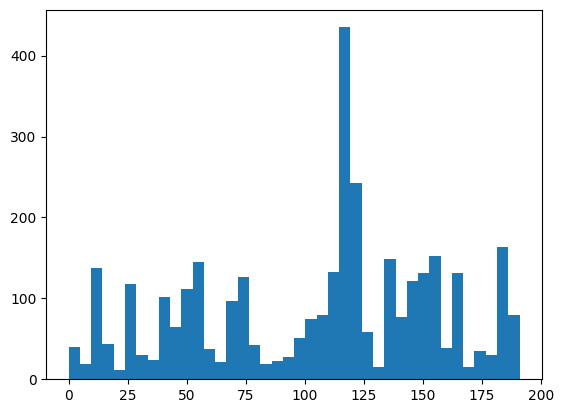

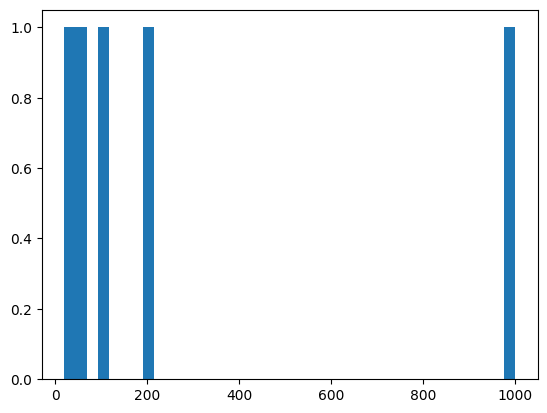

In [118]:
plt.hist(df['Address'],range=[0, 191], bins=40)
plt.show()
plt.hist([20,50,100,200,1000], bins=40)
plt.show()

In [ ]:
cdf = df[['Area', 'Room', 'Address', 'Parking', 'Warehouse', 'Elevator']]
cdf.hist()
plt.show()

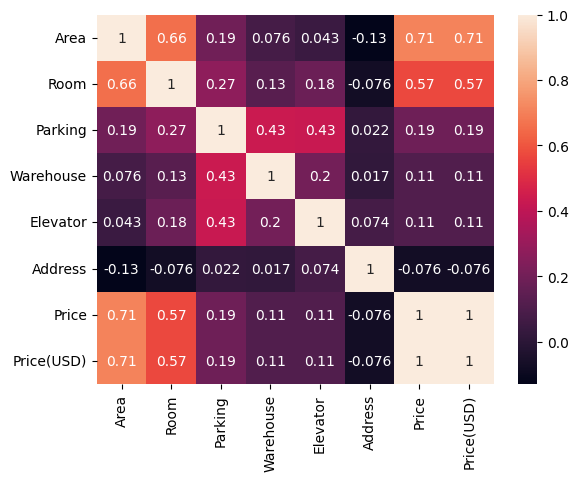

In [8]:
corr = df.corr()
sb.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('weight_chart_dpi.png', bbox_inches='tight', dpi=300)

In [114]:
cdf = df[['Area', 'Room' ,'Price(USD)']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Area', 'Room']])
train_y = np.asanyarray(train[['Price(USD)']])

test_x = np.asanyarray(test[['Area', 'Room']])
test_y = np.asanyarray(test[['Price(USD)']])

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x_df = np.asanyarray(df[['Area', 'Room']])
y_df = np.asanyarray(df['Price(USD)'])
train_x , test_x , train_y , test_y = train_test_split(x_df , y_df, random_state=5)

poly = PolynomialFeatures(degree=4)
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ))

Mean absolute error: 80659.95
Residual sum of squares (MSE): 27518871477.67
R2-score: 0.64


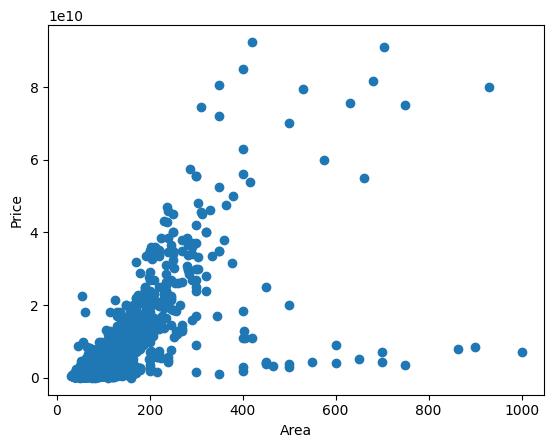

In [117]:
x = df['Area']
y = df["Price"]
plt.scatter(x, y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.show()